# Visualisierung mit Seaborn

#### Bibliotheken importieren

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Konfoguration der Schriften

In [2]:
# Fig Size
figconf = {
    "figsize": (10, 6)
}

# Titel
tfont = {
    "family": "sans-serif",
    "weight": "bold",
    "size": "14"
}

# Label
lfont = {
    "family": "sans-serif",
    "size": "12"
}

#### Datensätze laden

In [3]:
cars = sns.load_dataset("mpg")
titanic = sns.load_dataset("titanic")

cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Scatterplot

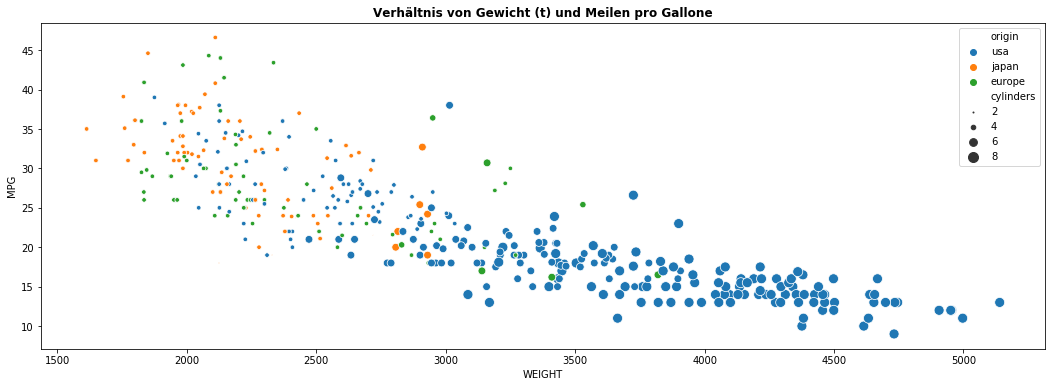

In [4]:
fig, ax = plt.subplots(figsize=(18, 6))
conf = {
    "x": "weight",
    "y": "mpg",
    "hue": "origin",
    "size": "cylinders",
    "sizes": (1, 100),
    "data": cars,
    "ax": ax
}
font = {"weight": "bold"}
sns.scatterplot(**conf)
ax.set(xlabel=conf["x"].upper(), ylabel=conf["y"].upper())
plt.title("Verhältnis von Gewicht (t) und Meilen pro Gallone", **font)
#plt.savefig("seaborn-scatterplot", dpi=300)
plt.show()

## Regplot

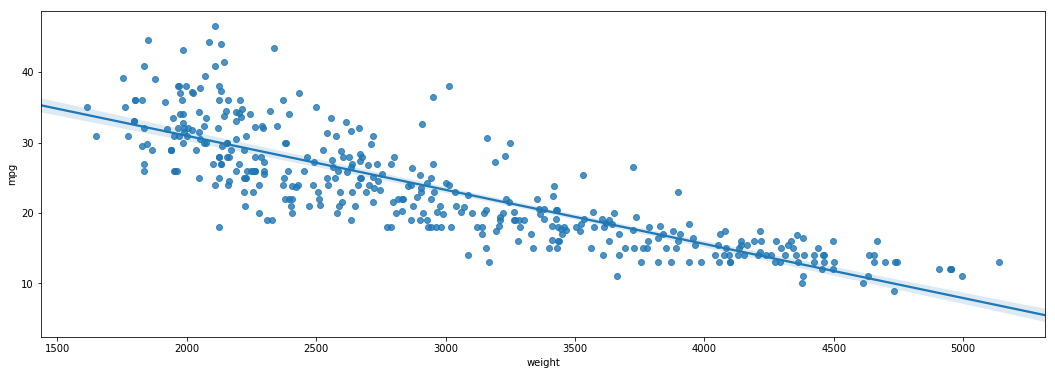

In [5]:
fig, ax = plt.subplots(figsize=(18,6))
sns.regplot(x="weight", y="mpg", data=cars, ax=ax)
#plt.xlim(1000, 6000)
#plt.ylim(0, 50)
#plt.savefig("seaborn-regplot", dpi=300)
plt.show()

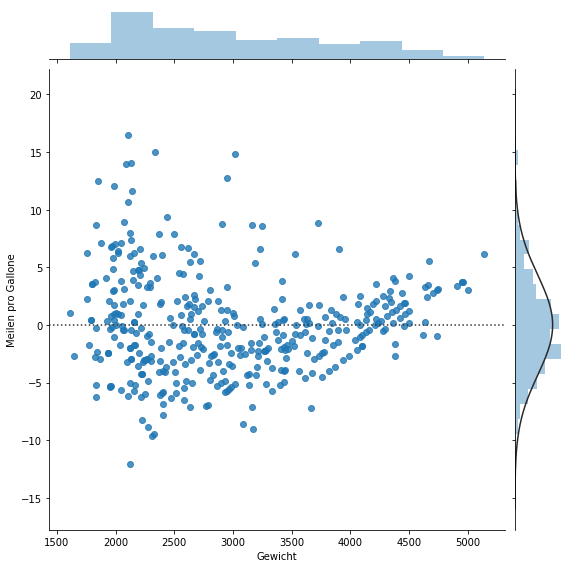

In [6]:
conf = {
    "x": "weight",
    "y": "mpg",
    "kind": "resid",
    "data": cars,
    "height": 8,
    "ratio": 8,
#    "xlim": (1000, 6000),
#    "ylim": (0, 50)
}

f = sns.jointplot(**conf)
f.set_axis_labels("Gewicht", "Meilen pro Gallone")
#plt.savefig("seaborn-jointplot", dpi=300)
plt.show()

## Heatmap

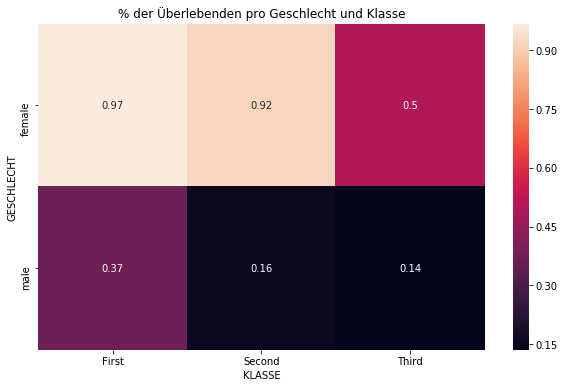

In [7]:
params = {
    "columns":"class", 
    "index": "sex",
    "values": "survived",
    "aggfunc": "mean",
}
titanic_pivot = titanic.pivot_table(**params)

# Grafik anlegen
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(titanic_pivot, annot=True, ax=ax)
ax.set(xlabel="KLASSE", ylabel="GESCHLECHT")
ax.set_title("% der Überlebenden pro Geschlecht und Klasse")

# Grafik anzeigen
plt.show()

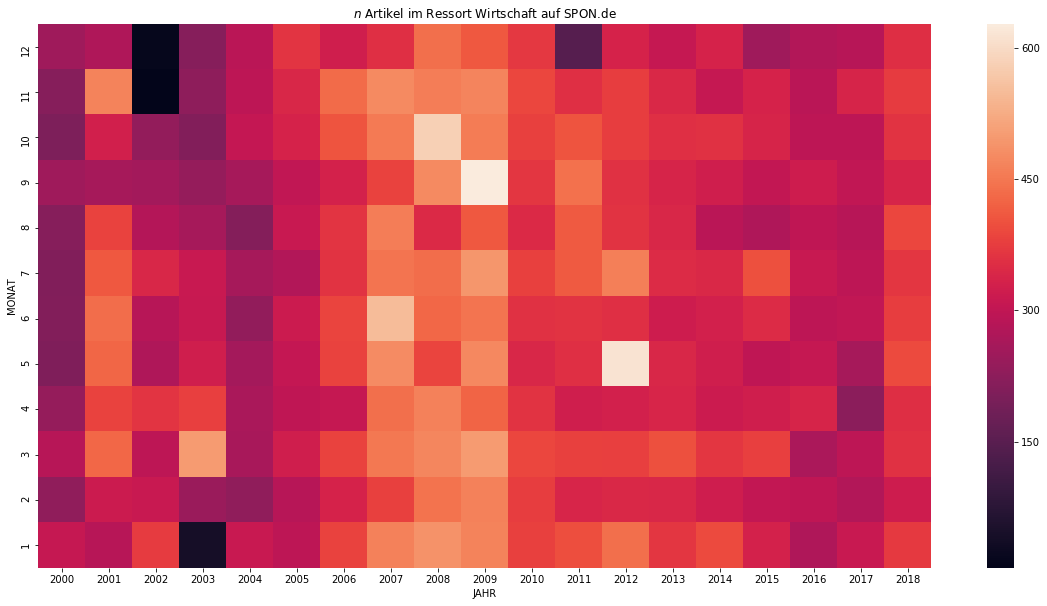

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Daten einlesen
spon = pd.read_csv("spon-archive.tsv", sep="\t")
spon = spon[(spon.year >= 2000) & (spon.year < 2019)]
pivot = {
    "columns":"year", 
    "index":"month",
    "values": "dummy$wirtschaft",
    "aggfunc": np.count_nonzero,
}
spon_pivot = spon.pivot_table(**pivot)
spon_pivot.sort_index(ascending=False, inplace=True)
# Grafik erstellen
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(spon_pivot, ax=ax)
# Beschriftungen hinzufügen
ax.set(xlabel="JAHR", ylabel="MONAT")
ax.set_title("$n$ Artikel im Ressort Wirtschaft auf SPON.de")
plt.savefig("seaborn-heatmap-spon", dpi=300)
plt.show()

## Histogramm

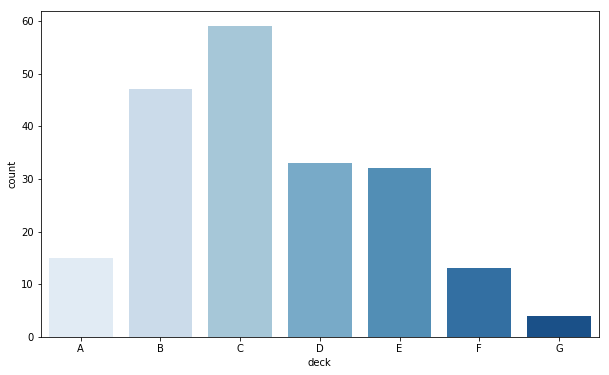

In [9]:
fig, ax = plt.subplots(**figconf)
sns.countplot(x="deck", data=titanic, palette="Blues", ax=ax)
# https://seaborn.pydata.org/tutorial/color_palettes.html
plt.savefig("seaborn-histogramm", dpi=300)
plt.show()

## Barplot

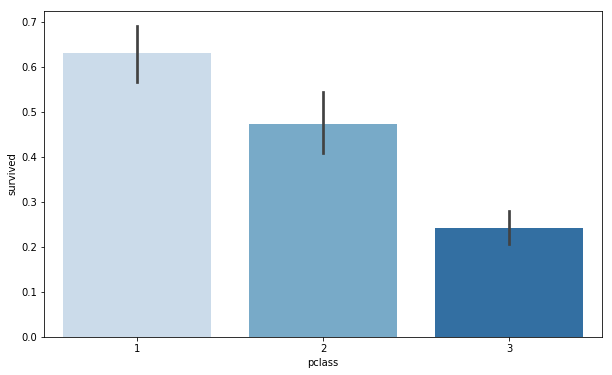

In [10]:
fig, ax = plt.subplots(**figconf)
sns.barplot(x="pclass", y="survived", data=titanic, palette="Blues", ax=ax)
plt.savefig("seaborn-barplot", dpi=300)
plt.show()

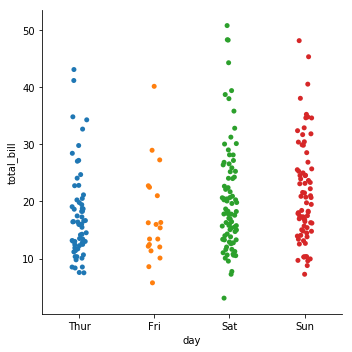

In [11]:
tips = sns.load_dataset("tips")
sns.catplot(x="day", y="total_bill", data=tips)
plt.show()

## Categorical Plots

#### einfach

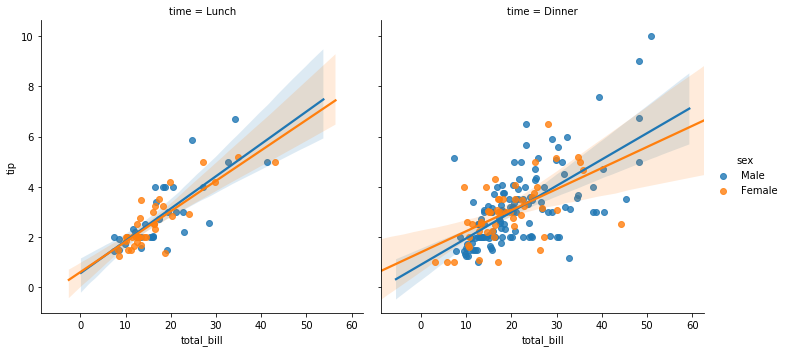

In [13]:
sns.lmplot(x="total_bill", y="tip", data=tips, hue="sex", col="time")
plt.show()

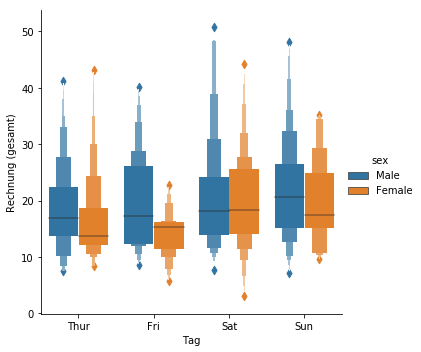

In [14]:
tips = sns.load_dataset("tips")
conf = {
    "x": "day", 
    "y": "total_bill", 
    "hue": "sex", 
    "kind": "boxen", 
    "data": tips,
}
f = sns.catplot(**conf)
f.set_axis_labels("Tag", "Rechnung (gesamt)")
f.savefig("seaborn-catplot-boxen", dpi=300)
plt.show()

### Facet Grid

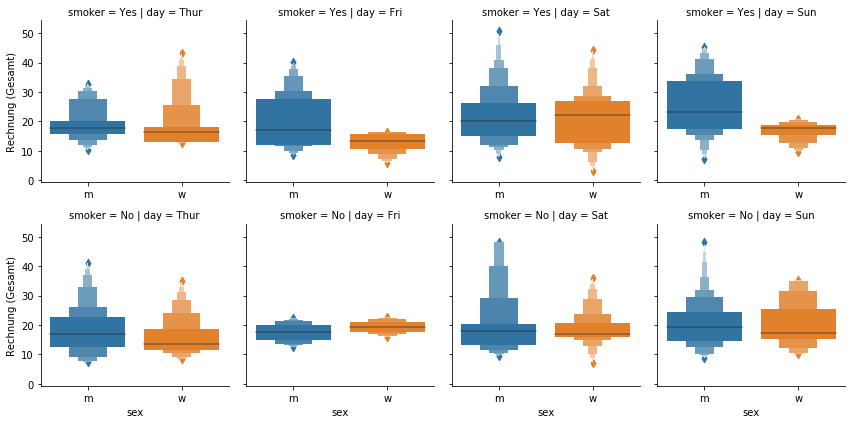

In [15]:
conf = {
    "x": "sex", 
    "y": "total_bill", 
    "row": "smoker",
    "col": "day",
    "hue": "sex", 
    "kind": "boxen", 
    "data": tips,
    "height": 3,
    "sharex": False,
    "dodge": False,
}
f = sns.catplot(**conf)
f.set_ylabels("Rechnung (Gesamt)")
f.set_xticklabels(["m", "w"])
plt.show()